In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.stats import norm # for scientific computing
from scipy import stats, integrate

In [2]:
melbourne_data = pd.read_csv(r"C:\Users\Acc\Desktop\Real Estate Market comprehensive Analysis\Melbourne_housing_FULL.csv")

In [3]:
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
melbourne_data.shape

(34857, 21)

In [5]:
melbourne_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [6]:
print(melbourne_data.select_dtypes(["object"]).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [7]:
objdtype_cols = melbourne_data.select_dtypes(["object"]).columns
melbourne_data[objdtype_cols] = melbourne_data[objdtype_cols].astype("category")

In [8]:
melbourne_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  category
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  float64 
 10  Bedroom2       26640 non-null  float64 
 11  Bathroom       26631 non-null  float64 
 12  Car            26129 non-null  float64 
 13  Landsize       23047 non-null  float64 
 14  BuildingArea   13742 non-null  float64 
 15  YearBuilt      15551 non-null  float64 
 16  CouncilArea    34854 non-null  category
 17  Lattitude      26881 non-null  

In [9]:
melbourne_data["Date"] = pd.to_datetime(melbourne_data["Date"])

In [10]:
melbourne_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  category
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  float64 
 10  Bedroom2       26640 non-null  float64 
 11  Bathroom       26631 non-null  float64 
 12  Car            26129 non-null  float64 
 13  Landsize       23047 non-null  float64 
 14  BuildingArea   13742 non-null  float64 
 15  YearBuilt      15551 non-null  float64 
 16  CouncilArea    34854 non-null  category
 17  Lattitude      26881 non-null  

In [11]:
melbourne_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [12]:
melbourne_data["Postcode"] = melbourne_data["Postcode"].astype("category")
melbourne_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03
Lattitude,26881.0,-3.781063e+01,0.090279,-38.19043,-37.86295,-37.8076,-3.775410e+01,-3.739020e+01


In [13]:
melbourne_data["b 2 r"] = melbourne_data["Bedroom2"] - melbourne_data["Rooms"]
melbourne_data[["b 2 r", "Bedroom2", "Rooms"]].head()

,b 2 r,Bedroom2,Rooms
0,0.0,2.0,2
1,0.0,2.0,2
2,0.0,2.0,2
3,0.0,3.0,3
4,0.0,3.0,3


In [14]:
melbourne_data = melbourne_data.drop(["b 2 r", "Bedroom2"],1)

<AxesSubplot:>

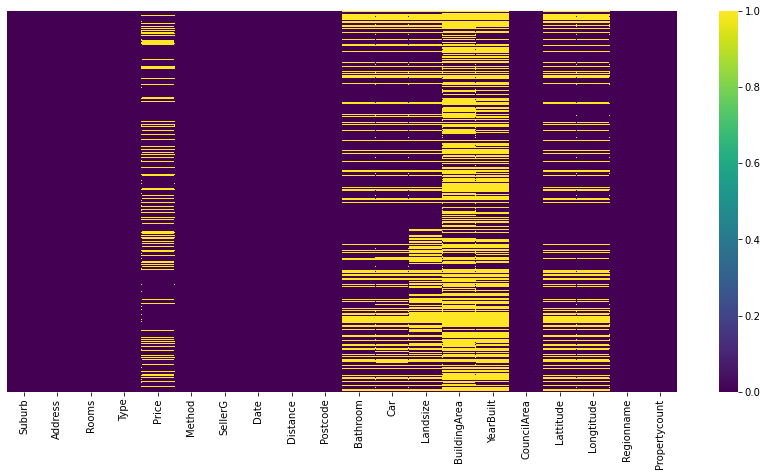

In [15]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(melbourne_data.isnull(), yticklabels=False,cmap="viridis")

In [16]:
melbourne_data.isnull().sum()/len(melbourne_data)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

In [17]:
melbourne_data = melbourne_data.drop(["Landsize","BuildingArea","YearBuilt"],
                                    axis=1)

In [18]:
# Also since our target variable is price, it makes sense to drop rows for 
# price columns where price values are missing
melbourne_data.dropna(subset=["Price"], inplace=True)

In [19]:
# filling up the missing data with "Fillna"
melbourne_data["Car"] = melbourne_data["Car"].fillna(melbourne_data["Car"].
                                                    mode()[0])
melbourne_data["Bathroom"] = melbourne_data["Bathroom"].fillna(melbourne_data
                                                               ["Bathroom"].
                                                              mode()[0])

In [20]:
melbourne_data.shape

(27247, 17)

In [21]:
# Percentage of missing values
melbourne_data.isnull().sum()/len(melbourne_data)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.003670
Postcode          0.003670
Bathroom          0.000000
Car               0.000000
CouncilArea       0.011010
Lattitude        22.952986
Longtitude       22.952986
Regionname        0.011010
Propertycount     0.011010
dtype: float64

In [22]:
melbourne_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,27247.0,2.992293e+00,0.954795,1.00000,2.0000,3.00000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.0000,870000.00000,1.295000e+06,1.120000e+07
Distance,27246.0,1.128028e+01,6.787469,0.00000,6.4000,10.50000,1.400000e+01,4.810000e+01
Bathroom,27247.0,1.451683e+00,0.661993,0.00000,1.0000,1.00000,2.000000e+00,9.000000e+00
Car,27247.0,1.786655e+00,0.869543,0.00000,1.0000,2.00000,2.000000e+00,1.800000e+01
Lattitude,20993.0,-3.780696e+01,0.091619,-38.19043,-37.8609,-37.80046,-3.774897e+01,-3.739780e+01
Longtitude,20993.0,1.449967e+02,0.120680,144.42379,144.9253,145.00320,1.450688e+02,1.455264e+02
Propertycount,27244.0,7.566781e+03,4492.382418,83.00000,4294.0000,6567.00000,1.041200e+04,2.165000e+04


In [23]:
## to findout outliers lets divide data into different price ranges to identify number of occurences of data in different price ranges
melbourne_data['PriceRange'] = np.where(melbourne_data['Price'] <= 100000, '0-100,000',  
                                       np.where ((melbourne_data['Price'] > 100000) & (melbourne_data['Price'] <= 1000000), '100,001 - 1M',
                                                np.where((melbourne_data['Price'] > 1000000) & (melbourne_data['Price'] <= 3000000), '1M - 3M',
                                                        np.where((melbourne_data['Price']>3000000) & (melbourne_data['Price']<=5000000), '3M - 5M',
                                                                np.where((melbourne_data['Price']>5000000) & (melbourne_data['Price']<=6000000), '5M - 6M',
                                                                        np.where((melbourne_data['Price']>6000000) & (melbourne_data['Price']<=7000000), '6M - 7M',
                                                                                np.where((melbourne_data['Price']>7000000) & (melbourne_data['Price']<=8000000), '7M-8M', 
                                                                                         np.where((melbourne_data['Price']>8000000) & (melbourne_data['Price']<=9000000), '8M-9M',
                                                                                                  np.where((melbourne_data['Price']>9000000) & (melbourne_data['Price']<=10000000), '9M-10M', 
                                                                                                         np.where((melbourne_data['Price']>10000000) & (melbourne_data['Price']<=11000000), '10M-11M', 
                                                                                                                 np.where((melbourne_data['Price']>11000000) & (melbourne_data['Price']<=12000000), '11M-12M', '')
                                                                                                                 ))))))))))
                                

In [24]:
melbourne_data.groupby(["PriceRange"]).agg({"PriceRange": ["count"]})

,PriceRange
,count
PriceRange,
"0-100,000",1
"100,001 - 1M",16496
11M-12M,1
1M - 3M,10304
3M - 5M,388
5M - 6M,40
6M - 7M,14
7M-8M,2


In [25]:
melbourne_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         27247 non-null  category
 1   Address        27247 non-null  category
 2   Rooms          27247 non-null  int64   
 3   Type           27247 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         27247 non-null  category
 6   SellerG        27247 non-null  category
 7   Date           27247 non-null  category
 8   Distance       27246 non-null  float64 
 9   Postcode       27246 non-null  category
 10  Bathroom       27247 non-null  float64 
 11  Car            27247 non-null  float64 
 12  CouncilArea    27244 non-null  category
 13  Lattitude      20993 non-null  float64 
 14  Longtitude     20993 non-null  float64 
 15  Regionname     27244 non-null  category
 16  Propertycount  27244 non-null  float64 
 17  PriceRange     27247 non-null  

In [26]:
melbourne_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,27247.0,2.992293e+00,0.954795,1.00000,2.0000,3.00000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.0000,870000.00000,1.295000e+06,1.120000e+07
Distance,27246.0,1.128028e+01,6.787469,0.00000,6.4000,10.50000,1.400000e+01,4.810000e+01
Bathroom,27247.0,1.451683e+00,0.661993,0.00000,1.0000,1.00000,2.000000e+00,9.000000e+00
Car,27247.0,1.786655e+00,0.869543,0.00000,1.0000,2.00000,2.000000e+00,1.800000e+01
Lattitude,20993.0,-3.780696e+01,0.091619,-38.19043,-37.8609,-37.80046,-3.774897e+01,-3.739780e+01
Longtitude,20993.0,1.449967e+02,0.120680,144.42379,144.9253,145.00320,1.450688e+02,1.455264e+02
Propertycount,27244.0,7.566781e+03,4492.382418,83.00000,4294.0000,6567.00000,1.041200e+04,2.165000e+04


In [27]:
# Lets drop those outliers

melbourne_data.drop(melbourne_data[(melbourne_data["PriceRange"] == "0-100,000") | 
                                  (melbourne_data["PriceRange"] == "7M-8M") | 
                                  (melbourne_data["PriceRange"] == "8M-9M") | 
                                  (melbourne_data["PriceRange"] == "11M-12M")].
                   index, inplace=True)

In [28]:
melbourne_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,27242.0,2.992218e+00,0.954690,1.00000,2.000000,3.00000,4.000000e+00,1.600000e+01
Price,27242.0,1.049047e+06,634071.219952,112000.00000,635000.000000,870000.00000,1.295000e+06,7.000000e+06
Distance,27241.0,1.128051e+01,6.787762,0.00000,6.400000,10.50000,1.400000e+01,4.810000e+01
Bathroom,27242.0,1.451509e+00,0.661618,0.00000,1.000000,1.00000,2.000000e+00,9.000000e+00
Car,27242.0,1.786580e+00,0.869334,0.00000,1.000000,2.00000,2.000000e+00,1.800000e+01
Lattitude,20988.0,-3.780695e+01,0.091624,-38.19043,-37.860878,-37.80042,-3.774891e+01,-3.739780e+01
Longtitude,20988.0,1.449967e+02,0.120686,144.42379,144.925300,145.00320,1.450688e+02,1.455264e+02
Propertycount,27239.0,7.566708e+03,4492.624011,83.00000,4294.000000,6567.00000,1.041200e+04,2.165000e+04


In [29]:
melbourne_data.groupby(["Rooms"])["Rooms"].count()

Rooms
1      1195
2      6787
3     11956
4      5916
5      1208
6       137
7        20
8        14
9         1
10        5
12        2
16        1
Name: Rooms, dtype: int64

In [30]:
# drop the outliers in rooms

melbourne_data.drop(melbourne_data[(melbourne_data["Rooms"] == 12) |
                                  (melbourne_data["Rooms"] == 16)].index,
                   inplace=True)

In [31]:
melbourne_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,27239.0,2.991079e+00,0.948347,1.00000,2.0000,3.0000,4.000000e+00,1.000000e+01
Price,27239.0,1.048780e+06,633264.427094,112000.00000,635000.0000,870000.0000,1.295000e+06,7.000000e+06
Distance,27238.0,1.127979e+01,6.786793,0.00000,6.4000,10.5000,1.400000e+01,4.810000e+01
Bathroom,27239.0,1.451155e+00,0.660108,0.00000,1.0000,1.0000,2.000000e+00,9.000000e+00
Car,27239.0,1.786299e+00,0.868535,0.00000,1.0000,2.0000,2.000000e+00,1.800000e+01
Lattitude,20985.0,-3.780696e+01,0.091627,-38.19043,-37.8609,-37.8004,-3.774892e+01,-3.739780e+01
Longtitude,20985.0,1.449967e+02,0.120651,144.42379,144.9253,145.0032,1.450687e+02,1.455264e+02
Propertycount,27236.0,7.566741e+03,4492.747970,83.00000,4294.0000,6567.0000,1.041200e+04,2.165000e+04


array([[<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Distance'}>,
        <AxesSubplot:title={'center':'Bathroom'}>],
       [<AxesSubplot:title={'center':'Car'}>,
        <AxesSubplot:title={'center':'Lattitude'}>,
        <AxesSubplot:title={'center':'Longtitude'}>,
        <AxesSubplot:title={'center':'Propertycount'}>]], dtype=object)

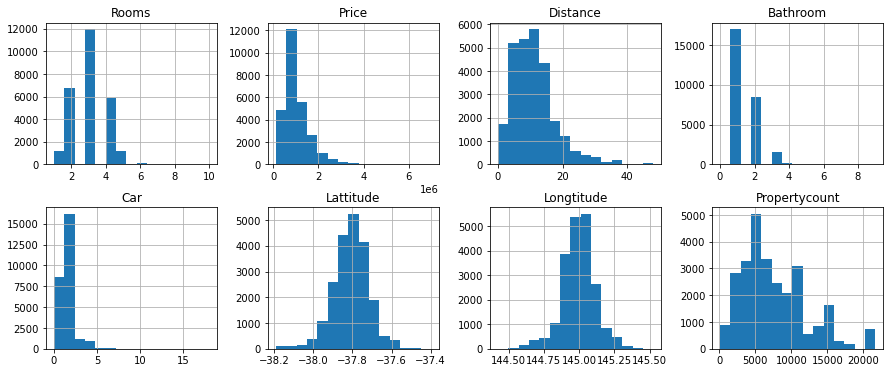

In [32]:
# sns.distplot(melbourne_data, kde=False, bins=20).set(xlabel="Price");
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
# melbourne_data.select_dtypes(include = numerics)
melbourne_data.select_dtypes(include = numerics).hist(bins=15, figsize=(15, 6),
                                                     layout=(2,4))

In [33]:
melbourne_data['Distance'] = round(melbourne_data['Distance'])

In [34]:
melbourne_data.shape

(27239, 18)

In [35]:
## extract year from date
melbourne_data["Year"] = melbourne_data["Date"].apply(lambda x:x.year)
melbourne_data.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,PriceRange,Year
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.0,3067.0,1.0,1.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,1M - 3M,2016
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.0,3067.0,1.0,0.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,1M - 3M,2016
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.0,3067.0,2.0,0.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,1M - 3M,2017
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.0,3067.0,2.0,1.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,"100,001 - 1M",2017
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.0,3067.0,1.0,2.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,1M - 3M,2016


In [36]:
# data subset by type
# house price
melbourne_data_h = melbourne_data[melbourne_data["Type"]=="h"]
# condo price
melbourne_data_u = melbourne_data[melbourne_data["Type"]=="u"]
# townhouse price
melbourne_data_t = melbourne_data[melbourne_data["Type"]=="t"]
#house, condo and townhouse price groupby "year" and "mean"
melbourne_data_h_y = melbourne_data_h.groupby("Year").mean()
melbourne_data_u_y = melbourne_data_u.groupby("Year").mean()
melbourne_data_t_y = melbourne_data_t.groupby("Year").mean()
melbourne_data_h_y.head()

,Rooms,Price,Distance,Bathroom,Car,Lattitude,Longtitude,Propertycount
Year,,,,,,,,
2016,3.225399,1.285387e+06,9.252613,1.490436,1.743443,-37.803695,144.985510,7170.396766
2017,3.348415,1.180507e+06,13.312164,1.567866,1.920823,-37.803014,145.001310,7416.489105
2018,3.382669,1.126411e+06,14.319141,1.649156,1.986580,-37.793123,144.995438,7576.329498


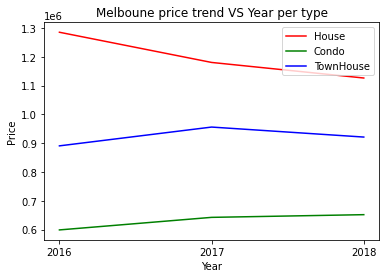

In [37]:
# sns.implot(x="Year", y="Price", hue="Type", data=melbourne_data,
# x_estimator=np.mean);
melbourne_data_h_y["Price"].plot(kind="line", color="r", label="House")
melbourne_data_u_y["Price"].plot(kind="line", color="g", label="Condo")
melbourne_data_t_y["Price"].plot(kind="line", color="b", label="TownHouse")
year_xticks=[2016,2017,2018]
plt.ylabel("Price")
plt.xticks( year_xticks)
plt.title("Melboune price trend VS Year per type")
plt.legend()

In [38]:
melbourne_data.shape

(27239, 19)

In [39]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'PriceRange',
       'Year'],
      dtype='object')

In [40]:
melbourne_data_South_M = melbourne_data[melbourne_data["Regionname"]=="Southern Metropolitan"]
melbourne_data_South_M_average = melbourne_data_South_M.groupby(["Year"])["Price"].mean()
# Series.to_frame()

In [41]:
# create X and y
X = melbourne_data_South_M[["Year"]]
y = melbourne_data_South_M[["Price"]]

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X,y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

[-1.44577955e+08]
[[72380.18518551]]


In [42]:
# stats modles

# you have to create a dataframe since the statsmodels formula interface expects 
# it
X_new = pd.DataFrame({"Year": [2019,2020,2021]})

# predict for a new observation
lm2.predict(X_new)

array([[1557639.01778024],
       [1630019.20296574],
       [1702399.38815126]])

In [43]:
melbourne_data_SM = melbourne_data[melbourne_data["Regionname"]=="Southern Metropolitan"]
melbourne_data_SM_u = melbourne_data_SM[melbourne_data_SM["Type"]=="u"]
melbourne_data_SM_u.shape

(2782, 19)

In [44]:
# stats modles

# create a fitted model
lm1 = smf.ols(formula="Price ~ Year", data=melbourne_data_SM_u).fit()

# print the coefficients
lm1.params

Intercept   -9.091530e+07
Year         4.542376e+04
dtype: float64

In [45]:
# you have to create a dataframe since the statsmodels formular interface
# expects it
X_new = pd.DataFrame({"Year":[2016,2017,2018,2019,2020,2021]})

# predict for a new observation
lm1.predict(X_new)

0    659000.900687
1    704424.661080
2    749848.421473
3    795272.181866
4    840695.942259
5    886119.702652
dtype: float64

In [46]:
lm1.rsquared

0.008001531244450799

In [47]:
melbourne_data_E = melbourne_data[melbourne_data["Regionname"]=="Eastern Metropolitan"]
melbourne_data_E_u = melbourne_data_E[melbourne_data_E["Type"]=="u"]
lme = smf.ols(formula="Price ~ Year", data=melbourne_data_E_u).fit()

# print the coefficients
lme.params

Intercept   -1.307691e+08
Year         6.518521e+04
dtype: float64

In [48]:
melbourne_data_E_u.shape

(431, 19)

In [49]:
X_new = pd.DataFrame({"Year":[2016,2017,2018,2019,2020,2021]})

# predict for a new observations
lme.predict(X_new)

0    644313.326193
1    709498.532146
2    774683.738099
3    839868.944051
4    905054.150004
5    970239.355957
dtype: float64

In [50]:
#get month information from date 
#df['year_month']=df.datetime_column.apply(lambda x: str(x)[:7])
#per = df.Date.dt.to_period("M")
# How many calls, sms, and data entries are in each month?
#data.groupby(['month', 'item'])
#df['birthdate'].groupby([df.birthdate.dt.year, df.birthdate.dt.month]).agg('count')
melbourne_data['Month']=pd.DatetimeIndex(melbourne_data['Date']).month

#lois[_y_m]=lois['Price'].groupby(['Month']).mean()
#Prepare data for pie chart to check sales based on month in order to see
# which month sell most.
melbourne_data_2016=melbourne_data[melbourne_data['Year']==2016]
melbourne_data_2017=melbourne_data[melbourne_data['Year']==2017]
melbourne_data_2018=melbourne_data[melbourne_data['Year']==2018]
melbourne_data_2016_count=melbourne_data_2016.groupby(['Month']).count()
melbourne_data_2017_count=melbourne_data_2017.groupby(['Month']).count()
melbourne_data_2018_count=melbourne_data_2018.groupby(['Month']).count()
Comparison={2016:melbourne_data_2016.shape,2017:melbourne_data_2017.shape,2018:melbourne_data_2018.shape}
Comparison

{2016: (8053, 20), 2017: (15512, 20), 2018: (3674, 20)}

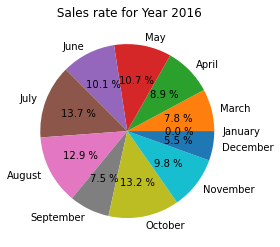

In [51]:
label_2016=['January','March','April','May','June','July','August','September',
            'October','November','December']
plt.pie(melbourne_data_2016_count['Price'],labels=label_2016,autopct='%.1f %%')
plt.title(' Sales rate for Year 2016')
plt.show()

Text(0.5, 1.0, 'Sales rate for Year 2017')

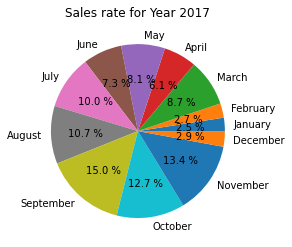

In [52]:
label_2017=['January','February','March','April','May','June','July','August',
            'September','October','November','December']
plt.pie(melbourne_data_2017_count['Price'],labels=label_2017,autopct='%.1f %%')
plt.title('Sales rate for Year 2017')

Text(0.5, 1.0, 'Sales rate for Year 2018')

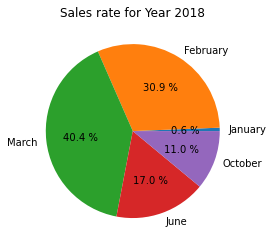

In [53]:
label_2018=['January','February','March','June','October']
plt.pie(melbourne_data_2018_count['Price'],labels=label_2018,autopct='%.1f %%')
plt.title('Sales rate for Year 2018')

In [54]:
# Abbreviate Regionname categories for presentation
melbourne_data["Regionabb"] = melbourne_data["Regionname"].map({'Northern Metropolitan':'N Metro',
                                            'Western Metropolitan':'W Metro', 
                                            'Southern Metropolitan':'S Metro', 
                                            'Eastern Metropolitan':'E Metro', 
                                            'South-Eastern Metropolitan':'SE Metro', 
                                            'Northern Victoria':'N Vic',
                                            'Eastern Victoria':'E Vic',
                                            'Western Victoria':'W Vic'})

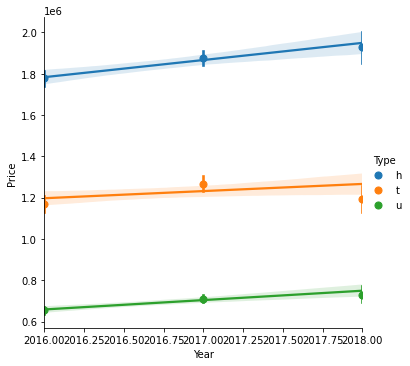

In [55]:
# South region price change VS year per type
sns.lmplot(x="Year", y="Price", hue="Type", data=melbourne_data[melbourne_data
                                                                ["Regionabb"]==
                                                                "S Metro"],
           x_estimator=np.mean);

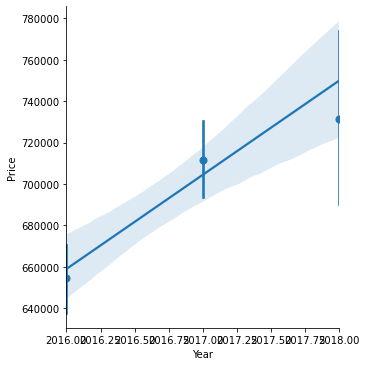

In [56]:
# East region Price change vs year one type for Condo
melbourne_data_S = melbourne_data[melbourne_data["Regionabb"]=="S Metro"]
sns.lmplot(x="Year", y="Price", data=melbourne_data_S[melbourne_data_S["Type"]==
                                                     "u"], x_estimator=
          np.mean);

In [57]:
Pct_change = melbourne_data.groupby(["Year","Regionabb", "Type"],
                                    as_index=False)["Price"].mean()
Pct_change = Pct_change.sort_values(["Regionabb","Type",
                                     "Year"]).set_index(np.arange(len
                                                                  (Pct_change.
                                                                  index)))
Pct_change.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       72 non-null     int64   
 1   Regionabb  72 non-null     category
 2   Type       72 non-null     category
 3   Price      59 non-null     float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 2.3 KB


In [58]:
melbourne_data_count_region_y=melbourne_data.groupby(['Year','Regionabb',
                                                      'Type'],
                                                     as_index=
                                                     False)['Price'].count()
melbourne_data_count_region_y = melbourne_data_count_region_y.sort_values(
    ['Regionabb','Type','Year']).set_index(np.arange(len
                                                     (melbourne_data_count_region_y.
                                                      index)))
melbourne_data_count_region_y.rename(columns={'Price':'Count'}, inplace=True)

In [59]:
# define function to get year growth rate against price per region and type
def PCTM(gg):
    df = pd.DataFrame(gg["Price"].pct_change())
    df["Year"] = gg["Year"]
    df["region"] =gg["Regionabb"]
    df["Type"] = gg["Type"]
    df = df[df["Year"]!=2016]
    return df

In [60]:
# df2[df2["id"].isin(["SP.POP.TOTL", "NY.GNP.PCAP.CD"])]
melboune_growthrate_y_t = PCTM(Pct_change)
melboune_growthrate_y_t1 = melboune_growthrate_y_t[melboune_growthrate_y_t["region"].
                                                    isin(["N Metro",
                                                          "S Metro",
                                                          "E Metro",
                                                         "SE Metro",
                                                         "W Metro",
                                                         "S Metro"])]
melboune_growthrate_y_t1.rename(columns={"Price":"Price Growth Rate"}, 
                                inplace = True)
melboune_growthrate_y_t1[melboune_growthrate_y_t1["Price Growth Rate"]>0.05]

C:\Users\Acc\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Price Growth Rate,Year,region,Type
4,0.117096,2017,E Metro,t
7,0.196149,2017,E Metro,u
22,0.052594,2017,N Metro,t
25,0.081640,2017,N Metro,u
40,0.126635,2017,SE Metro,t
44,0.078007,2018,SE Metro,u
46,0.054699,2017,S Metro,h
49,0.084488,2017,S Metro,t
52,0.087175,2017,S Metro,u
58,0.101220,2017,W Metro,t


In [61]:
# Sales count for each region
Sales_count=melbourne_data.groupby(['Regionabb'])['Price'].count()
Sales_count.head(10)

Regionabb
E Metro     3271
E Vic        166
N Metro     7864
N Vic        166
SE Metro    1340
S Metro     8520
W Metro     5814
W Vic         95
Name: Price, dtype: int64

In [62]:
Sales_count=melbourne_data.groupby(['Regionabb','Type'])['Price'].count()
Sales_count.nlargest(20)

Regionabb  Type
N Metro    h       5309
S Metro    h       4718
W Metro    h       4435
S Metro    u       2782
E Metro    h       2551
N Metro    u       1689
SE Metro   h       1036
S Metro    t       1020
N Metro    t        866
W Metro    u        810
           t        569
E Metro    u        431
           t        289
SE Metro   u        185
N Vic      h        162
E Vic      h        159
SE Metro   t        119
W Vic      h         93
E Vic      u          5
N Vic      u          3
Name: Price, dtype: int64

In [63]:
# define function to get year growth rate against count per region and type
def PCTMC(gg):
    df = pd.DataFrame(gg["Count"].pct_change())
    df["Year"] = gg["Year"]
    df["region"] =gg["Regionabb"]
    df["Type"] = gg["Type"]
    df = df[df["Year"]!=2016]
    return df

In [64]:
#df2[df2['id'].isin(['SP.POP.TOTL','NY.GNP.PCAP.CD'])]
melboune_growthrate_y_c=PCTMC(melbourne_data_count_region_y)
melboune_growthrate_y_c1=melboune_growthrate_y_c[melboune_growthrate_y_c['region'].isin(['N Metro','S Metro','E Metro','SE Metro','W Metro','S Metro'])]

melboune_growthrate_y_c1.rename(columns={'Count':'Count Growth Rate'}, inplace=True)
melboune_growthrate_y_c1[melboune_growthrate_y_c1['Count Growth Rate']>0.2]

C:\Users\Acc\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Count Growth Rate,Year,region,Type
1,2.753304,2017,E Metro,h
4,2.357143,2017,E Metro,t
7,1.570000,2017,E Metro,u
19,1.007979,2017,N Metro,h
22,0.721014,2017,N Metro,t
25,0.435563,2017,N Metro,u
37,19.641026,2017,SE Metro,h
40,20.500000,2017,SE Metro,t
43,37.000000,2017,SE Metro,u
46,0.325248,2017,S Metro,h


In [65]:
melboune_count1=melbourne_data_count_region_y[melbourne_data_count_region_y['Regionabb'].isin(['S Metro','E Metro',
                                                                                               'SE Metro','W Metro',
                                                                                               'S Metro','N Metro'])]
melboune_count1[melboune_count1['Count']>1000]

,Year,Regionabb,Type,Count
1,2017,E Metro,h,1704
18,2016,N Metro,h,1504
19,2017,N Metro,h,3020
45,2016,S Metro,h,1814
46,2017,S Metro,h,2404
51,2016,S Metro,u,1098
52,2017,S Metro,u,1416
54,2016,W Metro,h,1260
55,2017,W Metro,h,2543


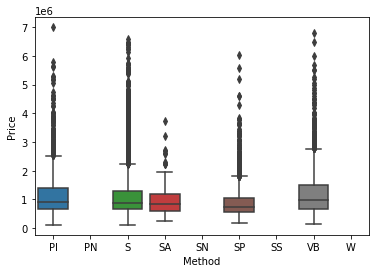

In [66]:
sns.boxplot(x="Method", y="Price", data=melbourne_data)
plt.show()
# sold method did not affect price

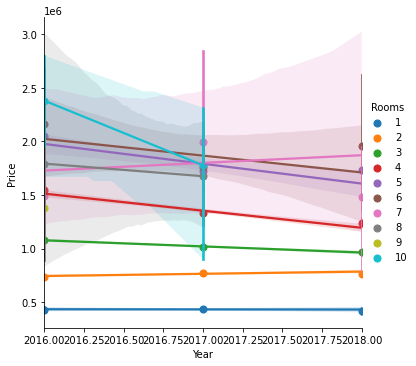

In [67]:
sns.lmplot(x="Year",y="Price",hue="Rooms",data=melbourne_data,
          x_estimator=np.mean);

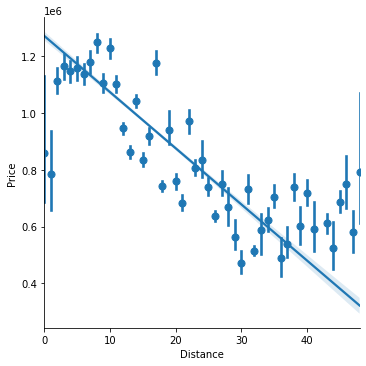

In [69]:
 #insights: Increase distance reduce price
sns.lmplot(x="Distance", y="Price", data=melbourne_data, x_estimator=np.mean);

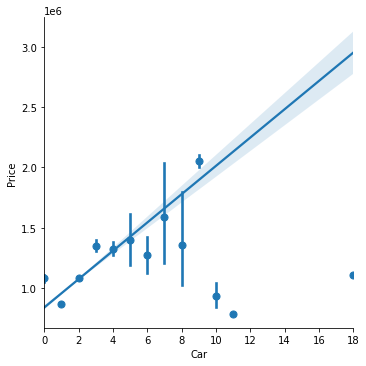

In [70]:
sns.lmplot(x="Car", y="Price", data=melbourne_data, x_estimator=np.mean);

In [71]:
Ideal_House = melbourne_data.groupby(["Regionabb","Type","Rooms","Bathroom"])[
    "Price"
].count()

Ideal_House.loc[["S Metro"],"h"].nlargest(10)

Regionabb  Type  Rooms  Bathroom
S Metro    h     3      1.0         1153
                        2.0          817
                 4      2.0          785
                 2      1.0          580
                 4      1.0          388
                        3.0          299
                 5      3.0          169
                        2.0          137
                        1.0           73
                 2      2.0           59
Name: Price, dtype: int64

In [72]:
Ideal_House.nlargest(10)

Regionabb  Type  Rooms  Bathroom
N Metro    h     3      1.0         2034
W Metro    h     3      1.0         1659
S Metro    u     2      1.0         1608
           h     3      1.0         1153
N Metro    u     2      1.0          931
           h     2      1.0          912
S Metro    h     3      2.0          817
                 4      2.0          785
N Metro    h     3      2.0          779
W Metro    h     3      2.0          769
Name: Price, dtype: int64

In [73]:
Ideal_House.loc[["E Metro"],"u"].nlargest(10)

Regionabb  Type  Rooms  Bathroom
E Metro    u     2      1.0         230
                 3      1.0         122
                        2.0          42
                 1      1.0          13
                 2      2.0          11
                 4      1.0           6
                        2.0           5
                 2      0.0           1
                 4      3.0           1
                 1      0.0           0
Name: Price, dtype: int64

In [74]:
corrmat = melbourne_data.corr()

<AxesSubplot:>

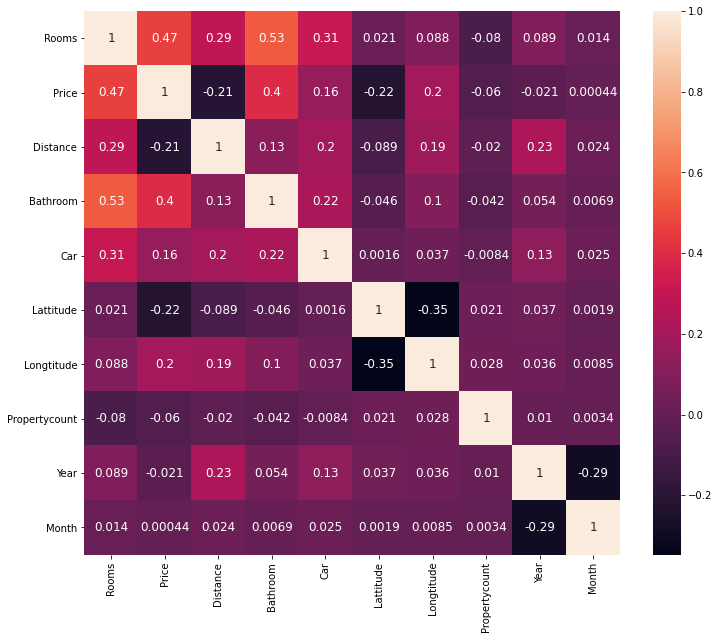

In [75]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat, annot=True, annot_kws={"size":12})

In [76]:
#define function to refine those correlation more than 0.3 with abs value
def getCorrelatedFeature(corrdata,threshold):
    feature=[]
    value=[]
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            feature.append(index)
            value.append(corrdata[index])
    df=pd.DataFrame(data=value,index=feature,columns=['Corr Value'])
    return df

In [77]:
threshold=0.3
corr_value=getCorrelatedFeature(corrmat['Price'],threshold)
corr_value

,Corr Value
Rooms,0.467636
Price,1.000000
Bathroom,0.396587


In [78]:
melbourne_data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            1
Postcode            1
Bathroom            0
Car                 0
CouncilArea         3
Lattitude        6254
Longtitude       6254
Regionname          3
Propertycount       3
PriceRange          0
Year                0
Month               0
Regionabb           3
dtype: int64

In [79]:
melbourne_data['Type_Code'] = melbourne_data['Type'].map({'h':3,
                                            't':2, 
                                            'u':1, 
                                            'dev site':0, 
                                            'o res':0, 
                                            'br':0})

In [80]:
# Group Regionname categories 
melbourne_data1 = pd.get_dummies(melbourne_data['Regionabb'],drop_first=False)
melbourne_data=pd.concat([melbourne_data,melbourne_data1],axis=1)
melbourne_data.columns.values

array(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount',
       'PriceRange', 'Year', 'Month', 'Regionabb', 'Type_Code', 'E Metro',
       'E Vic', 'N Metro', 'N Vic', 'SE Metro', 'S Metro', 'W Metro',
       'W Vic'], dtype=object)

In [82]:
melbourne_data_NN=melbourne_data[['Rooms','Distance', 'Bathroom', 'Car', 
                                  'Year', 'Propertycount','Type_Code',
                                  'N Metro','W Metro','S Metro','E Metro',
                                  'SE Metro','N Vic','E Vic',
                                  'W Vic','Price']].dropna()
melbourne_data_NN[['Rooms','Distance', 'Bathroom','Car', 'Year', 
                   'Propertycount','Type_Code','N Metro','W Metro',
                   'S Metro','E Metro','SE Metro','N Vic','E Vic','W Vic',
                   'Price']].isnull().sum()

Rooms            0
Distance         0
Bathroom         0
Car              0
Year             0
Propertycount    0
Type_Code        0
N Metro          0
W Metro          0
S Metro          0
E Metro          0
SE Metro         0
N Vic            0
E Vic            0
W Vic            0
Price            0
dtype: int64

In [83]:
melbourne_data_NN.shape


(27236, 16)

In [84]:
#Finding coefficient

X=melbourne_data_NN[['Rooms','Distance', 'Bathroom', 'Car', 'Year', 'Propertycount','Type_Code',
                     'N Metro','W Metro','S Metro','E Metro','SE Metro','N Vic','E Vic','W Vic']]
y=melbourne_data_NN['Price']

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state=5)


In [86]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X_train,y_train)

LinearRegression()

In [87]:
# Predict
# Predicting test set results
y_pred = regressor.predict(X_test)

In [88]:
regressor.score(X_test,y_test)

0.570662925365457

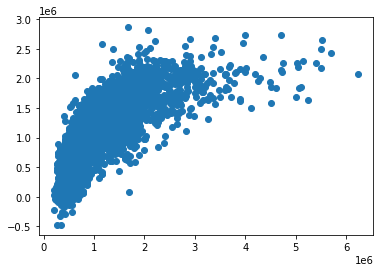

In [89]:
plt.scatter(y_test, y_pred)

C:\Users\Acc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

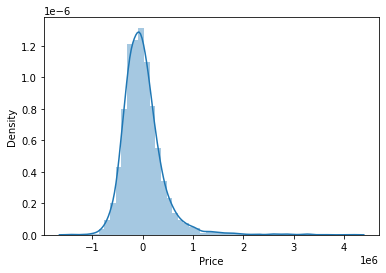

In [90]:
# Histogram of the distribution of residuals
sns.distplot((y_test - y_pred))

In [91]:
cdf = pd.DataFrame(data = regressor.coef_, index = X.columns,
                   columns = ['Coefficients'])
cdf

,Coefficients
Rooms,217253.425422
Distance,-42651.788584
Bathroom,141730.549265
Car,37952.843579
Year,29458.694976
Propertycount,0.265368
Type_Code,235465.603192
N Metro,-303961.129306
W Metro,-378402.904456
S Metro,224194.177339


In [92]:
X.head()

,Rooms,Distance,Bathroom,Car,Year,Propertycount,Type_Code,N Metro,W Metro,S Metro,E Metro,SE Metro,N Vic,E Vic,W Vic
1,2,2.0,1.0,1.0,2016,4019.0,3,1,0,0,0,0,0,0,0
2,2,2.0,1.0,0.0,2016,4019.0,3,1,0,0,0,0,0,0,0
4,3,2.0,2.0,0.0,2017,4019.0,3,1,0,0,0,0,0,0,0
5,3,2.0,2.0,1.0,2017,4019.0,3,1,0,0,0,0,0,0,0
6,4,2.0,1.0,2.0,2016,4019.0,3,1,0,0,0,0,0,0,0


In [95]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X,y)

MemoryError: could not allocate 172883968 bytes

In [94]:
clf.predict(X)

C:\Users\Acc\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:882: RuntimeWarning: invalid value encountered in true_divide
  proba /= len(self.estimators_)


AttributeError: 'list' object has no attribute 'take'

In [96]:
clf.score(X_test, y_test)

C:\Users\Acc\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:882: RuntimeWarning: invalid value encountered in true_divide
  proba /= len(self.estimators_)


AttributeError: 'list' object has no attribute 'take'

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
folds=StratifiedKFold(n_splits=3)

In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
print(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))

In [ ]:
print(get_score(LinearRegression(), X_train, X_test, y_train, y_test))

In [ ]:
# Define Function to get correlation, refine results and storage values

correlated_data=melbourne_data_NN[corr_value.index]
correlated_data.head(10)

In [ ]:
corr_value.index

In [ ]:
sns.pairplot(correlated_data)
plt.tight_layout()

In [ ]:
sns.heatmap(correlated_data.corr(),annot=True,annot_kws={'size':12})

In [ ]:
X1=correlated_data.drop(labels=['Price'],axis=1)
y1=correlated_data['Price']
X1.head()

In [ ]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=0)

In [ ]:
X1_train.shape,X1_test.shape

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
model = LinearRegression()
model.fit(X1_train,y1_train)

In [ ]:
y1_predict=model.predict(X1_test)

In [ ]:
y1_predict,y1_test

In [ ]:
df=pd.DataFrame(data=[y1_predict,y1_test])
df.T.head(5)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score=r2_score(y1_test,y1_predict)
mae=mean_absolute_error(y1_test,y1_predict)
mse=mean_squared_error(y1_test,y1_predict)
print("r2_score", score)
print("mae", mae)
print("mse", mse)

In [ ]:
#store feature performance
total_features=[]
total_features_name=[]
selected_correlation_value=[]
r3_score=[]
mae_value=[]
mse_value=[]

In [ ]:
def performance_metrics(features, th, y_true,y_pred):
    score=r2_score(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    
    total_features.append(len(features)-1)
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r3_score.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    
    metrics_dataframe=pd.DataFrame(data=[total_features_name, total_features,
                                         selected_correlation_value,r3_score,mae_value,mse_value],
                                   index=['Features name','Total features','corre value','r2 score','mae','mse'])
    return metrics_dataframe.T

In [ ]:
def get_y_predict(corrdata):
    X=corrdata.drop(labels=['Price'],axis=1)
    y=corrdata['Price']
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
    model=LinearRegression()
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    return y_predict

In [ ]:
th5=0.4
corr_value=getCorrelatedFeature(corrmat['Price'],th5)
correlated_data=melbourne_data_NN[corr_value.index]
y_predict=get_y_predict(correlated_data)
performance_metrics(correlated_data.columns,th5,y_test,y_predict)

In [ ]:
#Ploting learning curves
from sklearn.model_selection import learning_curve, ShuffleSplit

In [ ]:
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=None,train_sizes=np.linspace(0.1,1.0,10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes,train_scores,test_scores=learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean+train_scores_std,alpha=0.1,color="r")
    plt.fill_between(train_sizes,test_scores_mean - test_scores_std,test_scores_mean+test_scores_std,alpha=0.1,color="g")
    plt.plot(train_sizes,train_scores_mean,'o-',color="r",label="Training score")
    plt.plot(train_sizes,test_scores_mean,'o-',color="g",label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

X=correlated_data.drop(labels=['Price'],axis=1)
y=correlated_data['Price']

title="learning curves (linear regression)" + str(X.columns.values)
cv=ShuffleSplit(n_splits=100,test_size=0.2,random_state=0)

estimator=LinearRegression()
plot_learning_curve(estimator,title,X1,y1,ylim=(0.7,1.01),cv=cv,n_jobs=-1)

plt.show()